<a href="https://colab.research.google.com/github/Bharathwajrk123/DL_Project/blob/main/DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
data = pd.read_csv("/content/Epileptic Seizure Recognition.csv")
data = data.drop(columns=['Unnamed'])

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


y[y > 1] = 0

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [ ]:

model = Sequential()
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_rnn_model.keras', save_best_only=True, monitor='val_loss')
]

history = model.fit(X_train_scaled, y_train, epochs=150, batch_size=128, validation_split=0.2, callbacks=callbacks)

Epoch 1/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 45s 778ms/step - accuracy: 0.9779 - loss: 0.0672 - val_accuracy: 0.9690 - val_loss: 0.0840
Epoch 2/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 34s 588ms/step - accuracy: 0.9774 - loss: 0.0626 - val_accuracy: 0.9712 - val_loss: 0.0711
Epoch 3/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 40s 578ms/step - accuracy: 0.9794 - loss: 0.0591 - val_accuracy: 0.9712 - val_loss: 0.0896
Epoch 4/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 31s 542ms/step - accuracy: 0.9799 - loss: 0.0613 - val_accuracy: 0.9707 - val_loss: 0.0778
Epoch 5/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 43s 584ms/step - accuracy: 0.9811 - loss: 0.0570 - val_accuracy: 0.9663 - val_loss: 0.0782
Epoch 6/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 40s 558ms/step - accuracy: 0.9823 - loss: 0.0539 - val_accuracy: 0.9723 - val_loss: 0.0718
Epoch 7/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 40s 539ms/step - accuracy: 0.9828 - loss: 0.0514 - val_accuracy: 0.9717 - val_loss: 0.0799
Epoch 8/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 41s 537ms/step - accuracy: 0.9832 - loss: 0.0474 - 

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy * 100, "%")
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

predictions = model.predict(X_test_scaled)
predictions = (predictions > 0.5).astype(int)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9738 - loss: 0.0686
Loss: 0.06070299819111824
Accuracy: 97.65217304229736 %
Test Loss: 0.0607, Test Accuracy: 0.9765
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1857
           1       0.94      0.94      0.94       443

    accuracy                           0.98      2300
   macro avg       0.96      0.96      0.96      2300
weighted avg       0.98      0.98      0.98      2300

[[1830   27]
 [  27  416]]


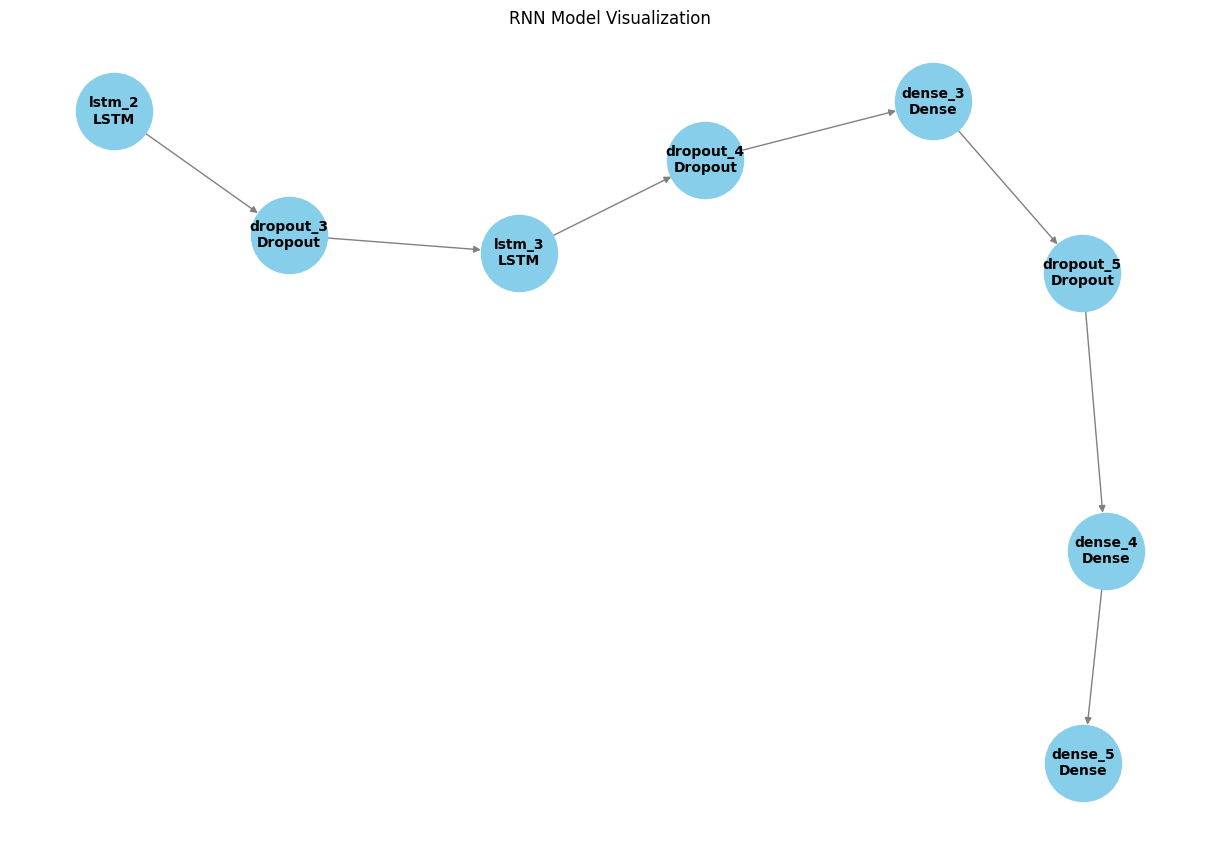

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
def visualize_model_rnn(model, file_name="rnn_model.png"):
    G = nx.DiGraph()
    for i, layer in enumerate(model.layers):
        G.add_node(i, label=f"{layer.name}\n{layer.__class__.__name__}")
    for i in range(len(model.layers) - 1):
        G.add_edge(i, i + 1)
    pos = nx.spring_layout(G)
    labels = nx.get_node_attributes(G, 'label')
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', font_color='black', edge_color='gray')
    plt.title("RNN Model Visualization")
    plt.savefig(file_name, format="png")
    plt.show()
visualize_model_rnn(model, file_name="rnn_model.png")

72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step
              precision    recall  f1-score   support

           0     0.9855    0.9855    0.9855      1857
           1     0.9391    0.9391    0.9391       443

    accuracy                         0.9765      2300
   macro avg     0.9623    0.9623    0.9623      2300
weighted avg     0.9765    0.9765    0.9765      2300



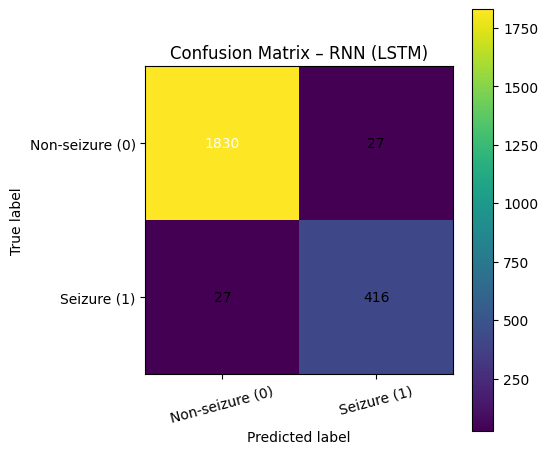

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
y_proba_rnn = model.predict(X_test_scaled).ravel()
y_pred_rnn  = (y_proba_rnn >= 0.5).astype(int)
print(classification_report(y_test, y_pred_rnn, digits=4))
cm_rnn = confusion_matrix(y_test, y_pred_rnn)
classes = ['Non-seizure (0)', 'Seizure (1)']
plt.figure(figsize=(5.5,5))
plt.imshow(cm_rnn, interpolation='nearest')
plt.title('Confusion Matrix – RNN (LSTM)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks([0,1], classes, rotation=15)
plt.yticks([0,1], classes)
threshold = cm_rnn.max() / 2.0
for i in range(cm_rnn.shape[0]):
    for j in range(cm_rnn.shape[1]):
        plt.text(j, i, format(cm_rnn[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm_rnn[i, j] > threshold else "black")

plt.colorbar()
plt.tight_layout()
plt.savefig('rnn_confusion_matrix.png', dpi=300)
plt.show()


72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step


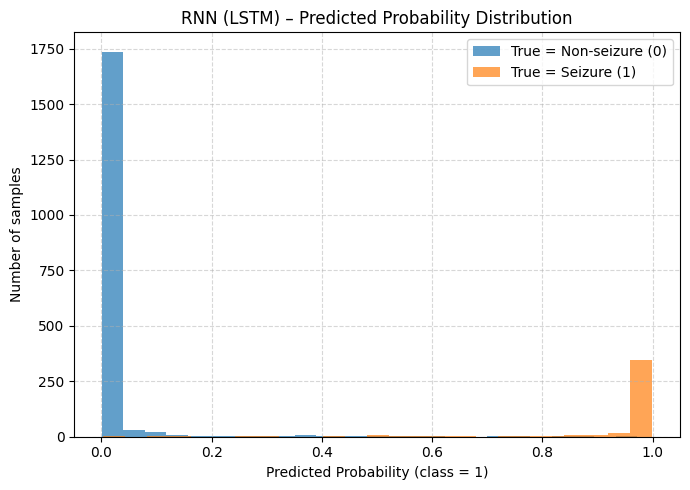

In [ ]:
import matplotlib.pyplot as plt
y_proba_rnn = model.predict(X_test_scaled).ravel()
plt.figure(figsize=(7,5))
plt.hist(y_proba_rnn[y_test==0], bins=25, alpha=0.7, label='True = Non-seizure (0)')
plt.hist(y_proba_rnn[y_test==1], bins=25, alpha=0.7, label='True = Seizure (1)')
plt.xlabel('Predicted Probability (class = 1)')
plt.ylabel('Number of samples')
plt.title('RNN (LSTM) – Predicted Probability Distribution')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("rnn_probability_histogram.png", dpi=300)
plt.show()
